In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import stabilizer
import stabilizer.iir_biquad_filter as iir_biquad_filter




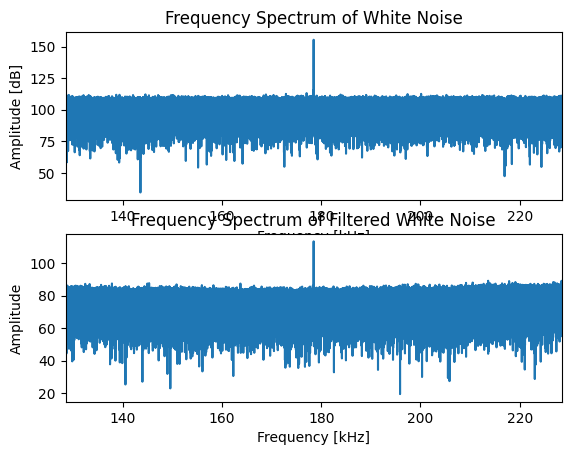

In [92]:
sample_period = stabilizer.SAMPLE_PERIOD

# Generate white noise
duration = 2.0  # duration in seconds
num_samples = int(duration / sample_period)
white_noise = 10*np.random.normal(0, 10, num_samples)
# add a strong component at frequency f
f = 168471.19627072586 + 10E3
white_noise += 100*np.sin(2*np.pi*f*np.arange(num_samples)*sample_period)

# Create a time array
time = np.arange(0, duration, sample_period)

# Low iir filter test
filter = iir_biquad_filter.IirBiquadFilter("notch", f0=200E3, K=1, Q=1)

# Apply the filter
filtered_noise = filter.apply_filter(white_noise)

# Perform Fourier transform
yf = fft(white_noise)
xf = fftfreq(num_samples, sample_period)[:num_samples//2] / 1E3  # in kHz

yf_filtered = fft(filtered_noise)

# Plot the spectrum in dB
fig, axs = plt.subplots(2, 1)
axs[0].plot(xf, 20*np.log10(np.abs(yf[:num_samples//2])))
axs[0].set_xlabel("Frequency [kHz]")
axs[0].set_ylabel("Amplitude [dB]")
axs[0].set_title("Frequency Spectrum of White Noise")
axs[0].set_xlim((f / 1E3 - 50, f / 1E3 + 50))  # Zoom around f ± 10 kHz
axs[1].plot(xf, 20*np.log10(np.abs(yf_filtered[:num_samples//2])))
axs[1].set_xlabel("Frequency [kHz]")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Frequency Spectrum of Filtered White Noise")
axs[1].set_xlim((f / 1E3 - 50, f / 1E3 + 50))  # Zoom around f ± 10 kHz
plt.show()

[100000. 105000. 110000. 115000. 120000. 125000. 130000. 135000. 140000.
 145000. 150000.]


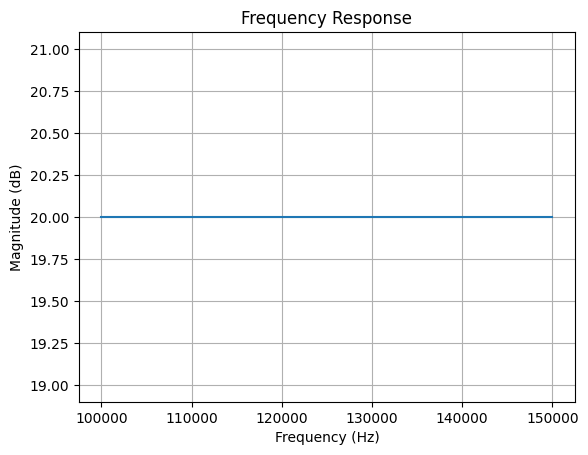

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

filter = iir_biquad_filter.IirBiquadFilter("notch", f0=125E3, K=1, Q=10)

# Define the sample rate and the frequencies to test
sample_rate = 1/stabilizer.SAMPLE_PERIOD  # Hz
frequencies = np.linspace(100E3, 150E3, 11) # Hz
print(frequencies)

# Initialize arrays to store the results
magnitudes = []

# Generate and filter the sinusoidal signals
for f in frequencies:
    t = np.arange(0, 0.2, 1.0 / sample_rate)  # 1 second of samples
    x = np.sin(2 * np.pi * f * t)  # Generate sinusoidal signal
    y = filter.apply_filter(x)  # Filter the signal
    magnitude = np.max(np.abs(y))  # Calculate the magnitude of the filtered signal
    magnitudes.append(magnitude)

# Plot the frequency response
plt.plot(frequencies, 20 * np.log10(magnitudes))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response')
plt.grid()
plt.show()